In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
import plotly.express as px
pd.set_option("display.max_columns" , None)

#Dataset Description
This dataset includes medical, lifestyle, and demographic data from individuals, with the goal of predicting the presence of Parkinson’s disease (Diagnosis: 1 for diagnosed, 0 for not).
It includes symptom assessment scores (e.g., UPDRS, Tremor, etc.), clinical measurements (e.g., blood pressure, cholesterol), medical history, and lifestyle factors (e.g., diet, sleep, physical activity).



**we have 35 features**

| Feature                    | Description                                                     |
| -------------------------- | --------------------------------------------------------------- |
| `PatientID`                | Unique identifier for each patient (drop this for modeling)     |
| `Age`                      | Age in years                                                    |
| `Gender`                   | 0 = Male, 1 = Female                                            |
| `Ethnicity`                | Categorical: encoded values for race/ethnic background          |
| `EducationLevel`           | Ordinal: likely levels from 0 (none) to 3 (college or higher)   |
| `BMI`                      | Body Mass Index                                                 |
| `Smoking`                  | Binary or ordinal: smoking status/frequency                     |
| `AlcoholConsumption`       | Level of alcohol intake                                         |
| `PhysicalActivity`         | Level of physical activity                                      |
| `DietQuality`              | Self-reported or clinical score on diet habits                  |
| `SleepQuality`             | Subjective or measured sleep quality                            |
| `FamilyHistoryParkinsons`  | 1 = Yes, 0 = No                                                 |
| `TraumaticBrainInjury`     | History of brain injury (binary)                                |
| `Hypertension`             | Diagnosis of high blood pressure                                |
| `Diabetes`                 | Diagnosis of diabetes                                           |
| `Depression`               | Diagnosis of depression                                         |
| `Stroke`                   | History of stroke                                               |
| `SystolicBP`               | Systolic blood pressure (top number)                            |
| `DiastolicBP`              | Diastolic blood pressure (bottom number)                        |
| `CholesterolTotal`         | Total cholesterol level                                         |
| `CholesterolLDL`           | Low-density lipoprotein (“bad” cholesterol)                     |
| `CholesterolHDL`           | High-density lipoprotein (“good” cholesterol)                   |
| `CholesterolTriglycerides` | Triglycerides in blood                                          |
| `UPDRS`                    | Unified Parkinson’s Disease Rating Scale (higher = more severe) |
| `MoCA`                     | Montreal Cognitive Assessment (higher = better cognition)       |
| `FunctionalAssessment`     | General ability to perform daily tasks                          |
| `Tremor`                   | Tremor symptoms (likely binary)                                 |
| `Rigidity`                 | Muscle stiffness (binary)                                       |
| `Bradykinesia`             | Slowness of movement (binary)                                   |
| `PosturalInstability`      | Balance issues/falls (binary)                                   |
| `SpeechProblems`           | Speech difficulty (binary)                                      |
| `SleepDisorders`           | Sleep-related disorders (binary)                                |
| `Constipation`             | Gastrointestinal symptom (binary)                               |
| `Diagnosis`                | **Target** variable: 1 = Parkinson’s, 0 = No                    |
| `DoctorInCharge`           | Confidential field – drop this for modeling                     |


In [ ]:
df=pd.read_csv('/content/parkinsons_disease_data.csv')

In [ ]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryParkinsons,TraumaticBrainInjury,Hypertension,Diabetes,Depression,Stroke,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,9.283194,0,0,0,0,0,0,129,60,222.842278,148.125623,37.867776,337.307114,6.458713,29.181289,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,5.602470,0,0,0,0,0,0,163,76,210.501133,153.756463,77.228117,264.635521,37.306703,12.332639,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,9.929824,0,0,0,1,0,0,113,93,287.387996,118.702600,85.588304,395.662649,67.838170,29.927783,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,4.196189,0,0,0,0,0,0,146,78,280.339546,136.299186,51.869626,362.189688,52.964696,21.304268,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,9.363925,0,0,0,0,0,0,115,94,284.014151,108.449452,25.069418,149.956586,21.804880,8.336364,3.200969,0,0,0,1,0,1,0,0,DrXXXConfid


| **Category**            | **Features**                                                                                  |
| ----------------------- | ----------------------------------------------------------------------------------------------------- |
| **Demographics**        | `Age`, `Gender`, `Ethnicity`, `EducationLevel`                                                        |
| **Lifestyle**           | `BMI`, `Smoking`, `AlcoholConsumption`, `PhysicalActivity`, `DietQuality`, `SleepQuality`             |
| **Medical History**     | `FamilyHistoryParkinsons`, `TraumaticBrainInjury`, `Hypertension`, `Diabetes`, `Depression`, `Stroke` |
| **Vitals & Lab Values** | `SystolicBP`, `DiastolicBP`, `CholesterolTotal`, `CholesterolLDL`, etc.                               |
| **Symptom Scores**      | `UPDRS`, `MoCA`, `FunctionalAssessment`, `Tremor`, `Rigidity`, `Bradykinesia`, etc.                   |
| **Target**              | `Diagnosis` (0 or 1)                                                                                  |
| **Drop**          | `PatientID`, `DoctorInCharge`                                                                         |


# Data analysis for the dataset

In [ ]:
def column_info(df):
  cols=[]
  dtypes=[]
  unique_v=[]
  n_unique_v=[]

  for col in df.columns:
    cols.append(col)
    dtypes.append(df[col].dtype.name)
    unique_v.append(df[col].unique())
    n_unique_v.append(df[col].nunique())

  return pd.DataFrame({'names':cols,'types':dtypes,'unique':unique_v,'n_unique':n_unique_v})


In [ ]:
column_info(df)

,names,types,unique,n_unique
0,PatientID,int64,"[3058, 3059, 3060, 3061, 3062, 3063, 3064, 306...",2105
1,Age,int64,"[85, 75, 70, 52, 87, 68, 78, 80, 71, 53, 74, 5...",40
2,Gender,int64,"[0, 1]",2
3,Ethnicity,int64,"[3, 0, 2, 1]",4
4,EducationLevel,int64,"[1, 2, 0, 3]",4
5,BMI,float64,"[19.619877964608285, 16.24733915647557, 15.368...",2105
6,Smoking,int64,"[0, 1]",2
7,AlcoholConsumption,float64,"[5.108240606772179, 6.027648029307635, 2.24213...",2105
8,PhysicalActivity,float64,"[1.3806599170830036, 8.409804050283633, 0.2132...",2105
9,DietQuality,float64,"[3.893969135156027, 8.513428249596062, 6.49880...",2105


## Show which symptoms are most common in patients with Parkinson's.

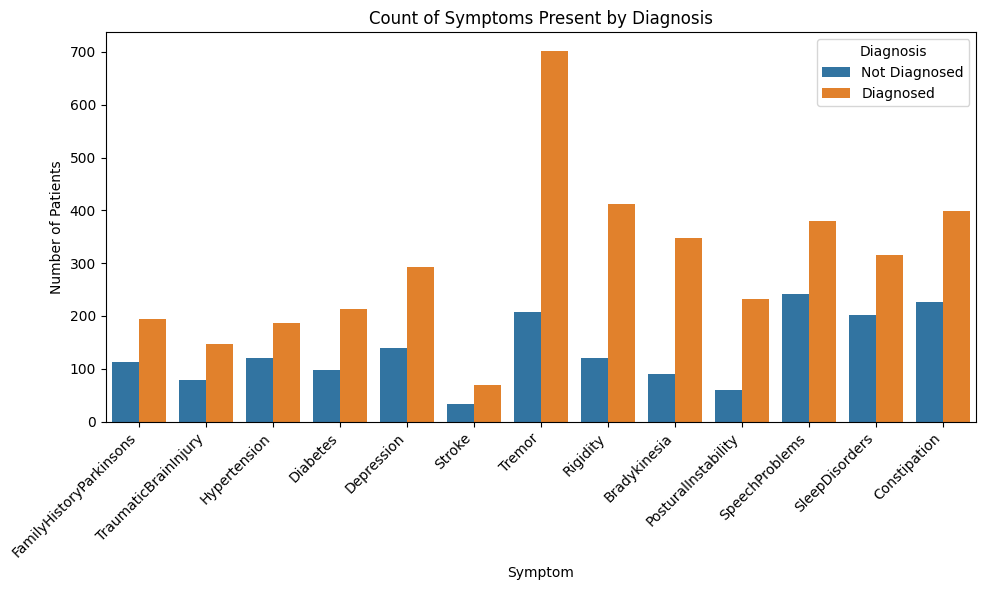

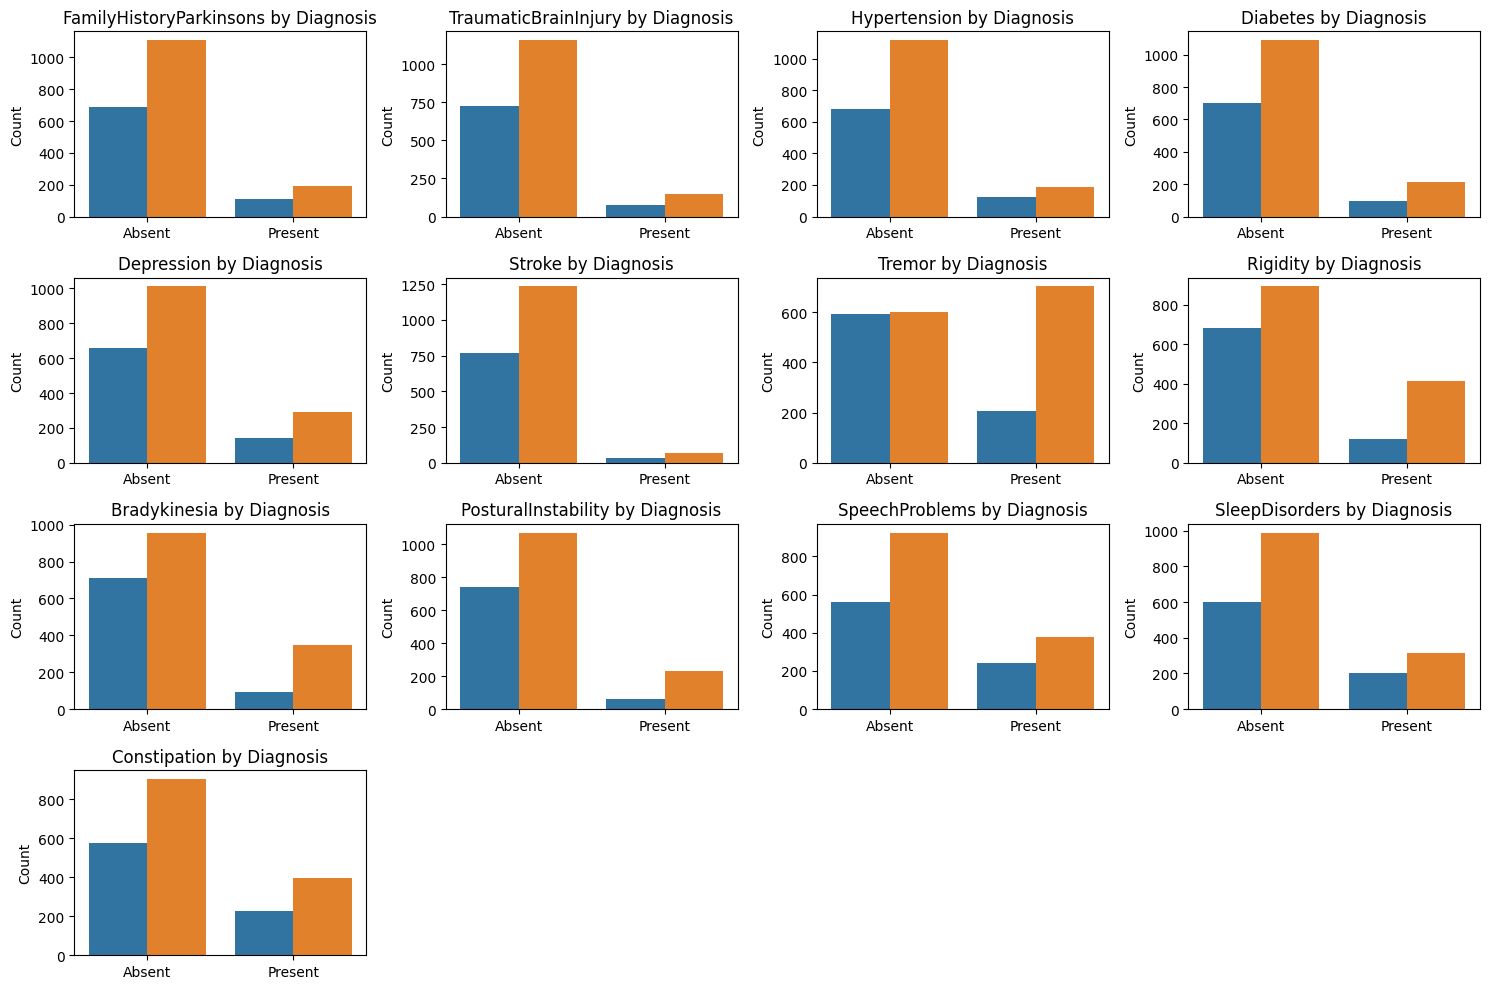

In [ ]:
# Select the binary symptom columns
symptom_columns = [
    'FamilyHistoryParkinsons',
    'TraumaticBrainInjury',
    'Hypertension',
    'Diabetes',
    'Depression',
    'Stroke',
    'Tremor',
    'Rigidity',
    'Bradykinesia',
    'PosturalInstability',
    'SpeechProblems',
    'SleepDisorders',
    'Constipation'
]

df_melted = df.melt(id_vars=['Diagnosis'], value_vars=symptom_columns, var_name='Symptom', value_name='Present')
df_symptoms_present = df_melted[df_melted['Present'] == 1]

plt.figure(figsize=(10, 6))
sns.countplot(data=df_symptoms_present, x='Symptom', hue='Diagnosis')
plt.title('Count of Symptoms Present by Diagnosis')
plt.xlabel('Symptom')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Diagnosis', labels=['Not Diagnosed', 'Diagnosed'])
plt.tight_layout()
plt.show()

# This shows the counts of both 'Present' (1) and 'Not Present' (0)
plt.figure(figsize=(15, 10))
for i, symptom in enumerate(symptom_columns):
    plt.subplot(4, 4, i + 1)
    sns.countplot(data=df, x=symptom, hue='Diagnosis')
    plt.title(f'{symptom} by Diagnosis')
    plt.xlabel('')
    plt.ylabel('Count')
    plt.xticks([0, 1], ['Absent', 'Present'])
    plt.legend([],[], frameon=False)

plt.tight_layout()
plt.show()

## Visualize how key clinical scores vary between diagnosed and healthy individuals.

In [ ]:
#key clinical scores to visualize
clinical_scores = ['UPDRS', 'MoCA', 'FunctionalAssessment', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal']

for score in clinical_scores:
    fig = px.violin(df, x="Diagnosis", y=score, color="Diagnosis",
                    box=True,
                    points="all",
                    labels={"Diagnosis": "Diagnosis (0: No, 1: Yes)"},
                    title=f'Interactive Violin Plot of {score} by Diagnosis')
    fig.update_layout(xaxis = dict(tickmode = 'array', tickvals = [0, 1], ticktext = ['Not Diagnosed', 'Diagnosed']))
    fig.show()

## How socio-demographic factors relate to Parkinson’s diagnosis.

<ipython-input-51-0b08f8980eaf>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-51-0b08f8980eaf>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-51-0b08f8980eaf>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-51-0b08f8980eaf>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




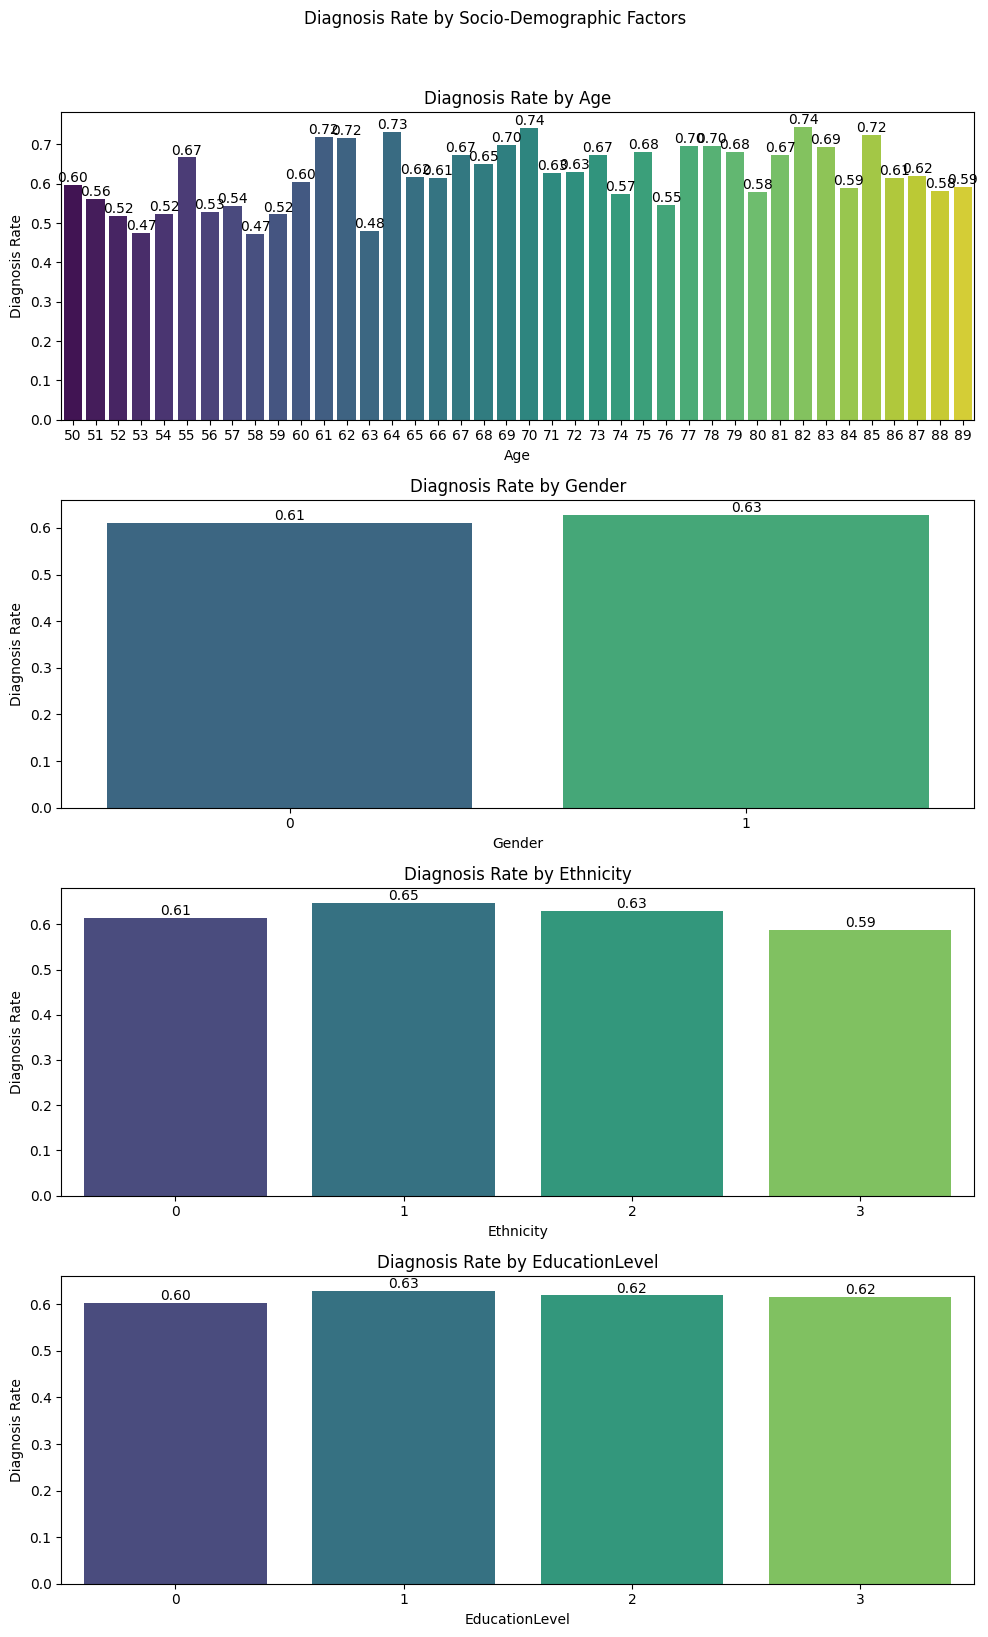

In [ ]:
#socio-demographic columns
socio_demographic_cols = ['Age', 'Gender', 'Ethnicity', 'EducationLevel']

# Create subplots for each socio-demographic factor
fig, axes = plt.subplots(nrows=len(socio_demographic_cols), ncols=1, figsize=(10, 4 * len(socio_demographic_cols)))
fig.suptitle('Diagnosis Rate by Socio-Demographic Factors', y=1.02) # Add a main title

for i, col in enumerate(socio_demographic_cols):
    # Calculate diagnosis rate per group
    diagnosis_rate = df.groupby(col)['Diagnosis'].value_counts(normalize=True).unstack().fillna(0)
    diagnosis_rate_diagnosed = diagnosis_rate[1]

    # Sort by diagnosis rate for better visualization
    diagnosis_rate_diagnosed = diagnosis_rate_diagnosed.sort_values(ascending=False)

    sns.barplot(x=diagnosis_rate_diagnosed.index, y=diagnosis_rate_diagnosed.values, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Diagnosis Rate by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Diagnosis Rate')
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', xytext=(0, 5), textcoords='offset points')


plt.tight_layout()
plt.show()

## How lifestyle affect on parkinson's

In [ ]:
# lifestyle factors across diagnosis
lifestyle_features = ['BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality']

for feature in lifestyle_features:
    fig = px.violin(df, x="Diagnosis", y=feature, color="Diagnosis",
                    box=True,
                    points="all",
                    labels={"Diagnosis": "Diagnosis (0: No, 1: Yes)"},
                    title=f' Violin Plot of {feature} by Diagnosis')
    fig.update_layout(xaxis = dict(tickmode = 'array', tickvals = [0, 1], ticktext = ['Not Diagnosed', 'Diagnosed']))
    fig.show()

## Correlation matrix heatmap.

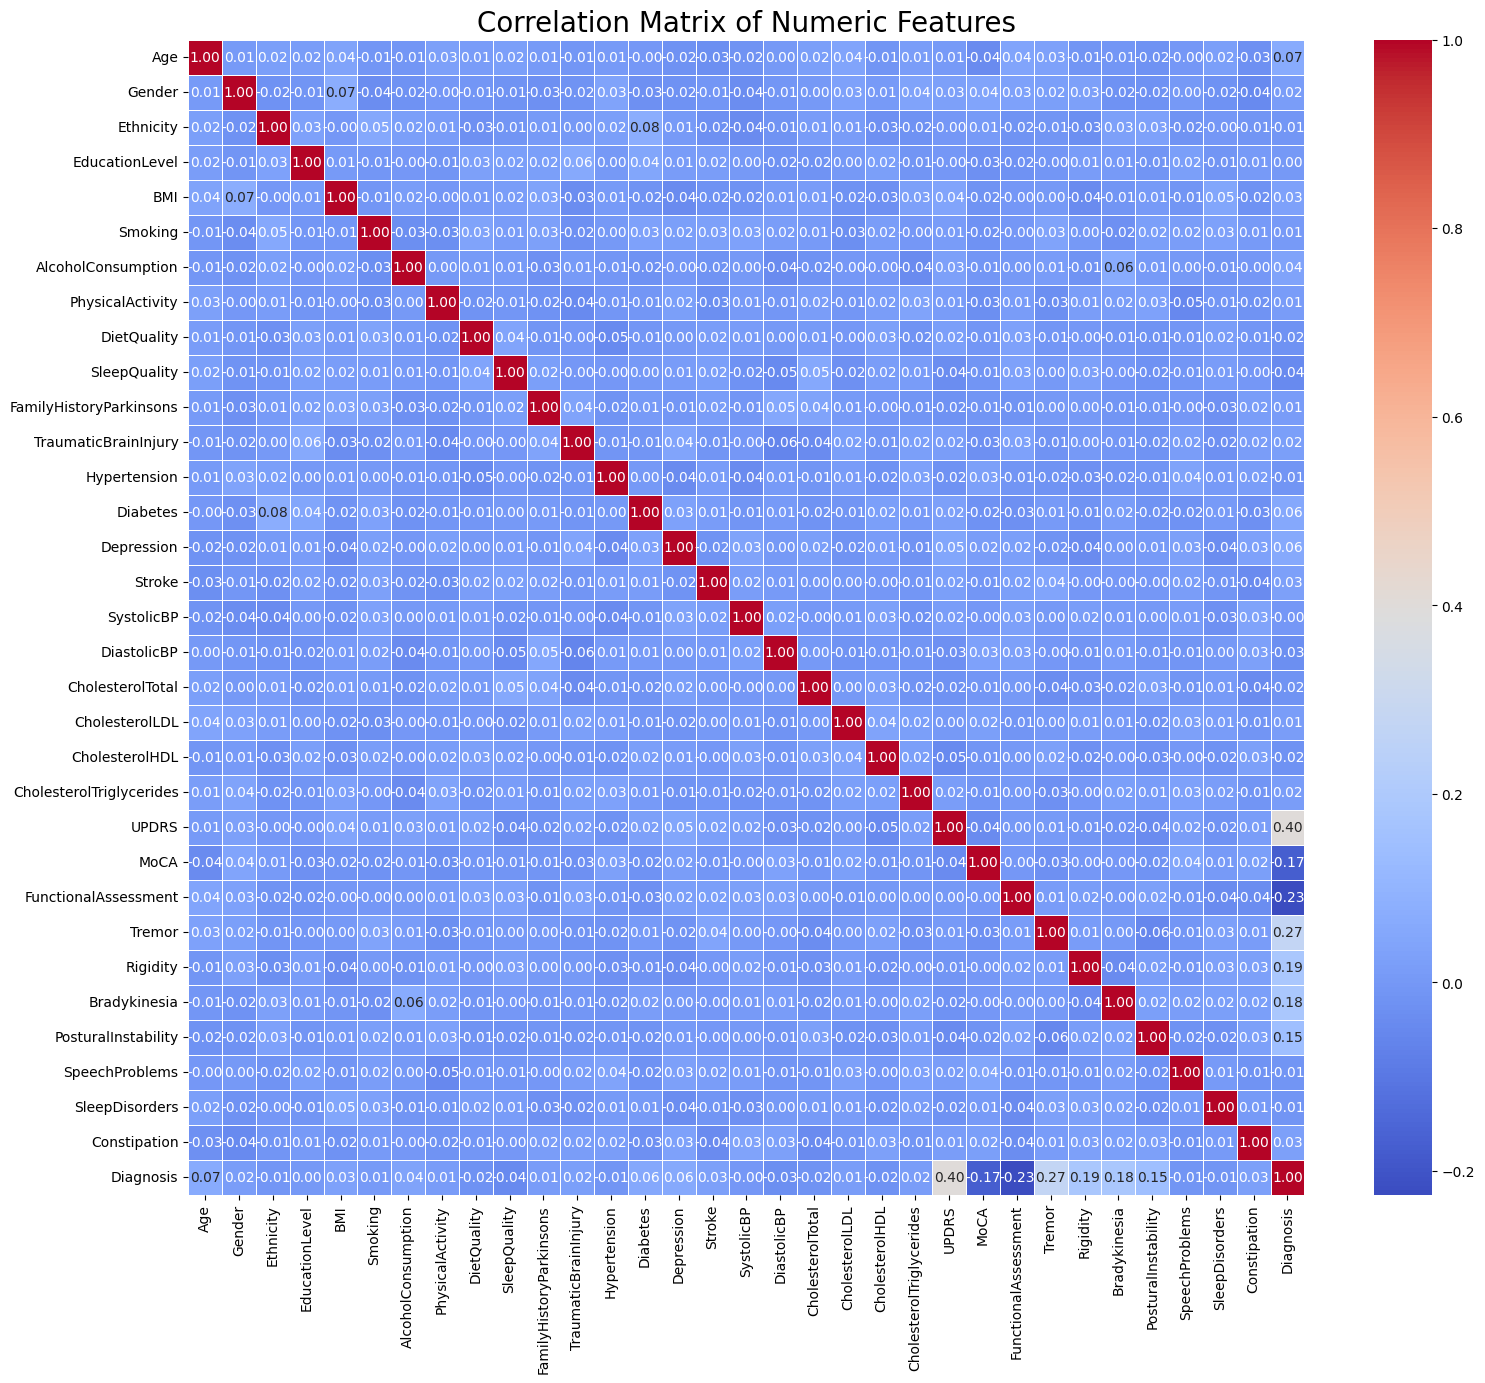

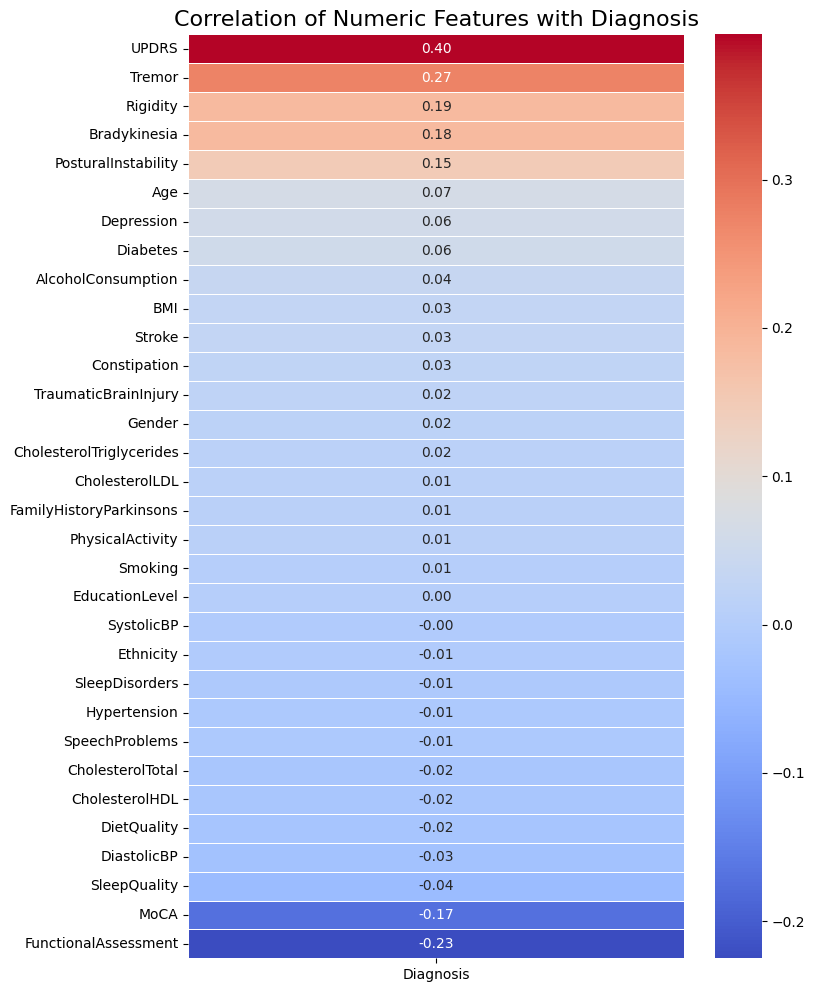

In [ ]:
numeric_df = df.select_dtypes(include=np.number)
numeric_df = numeric_df.drop(columns=['PatientID', 'DoctorInCharge'], errors='ignore')

plt.figure(figsize=(18, 15))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numeric Features', fontsize=20)
plt.show()

plt.figure(figsize=(8, 12))
# Sort the correlations by their absolute value to see strongest relationships first
correlation_with_target = numeric_df.corr()['Diagnosis'].sort_values(ascending=False).drop('Diagnosis')
sns.heatmap(correlation_with_target.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation of Numeric Features with Diagnosis', fontsize=16)
plt.show()

# Preprocessing

## Check missing values

In [ ]:
df.isnull().sum()

,0
PatientID,0
Age,0
Gender,0
Ethnicity,0
EducationLevel,0
BMI,0
Smoking,0
AlcoholConsumption,0
PhysicalActivity,0
DietQuality,0


No missing values

## Check for duplicates

In [ ]:
df.duplicated().sum()

np.int64(0)

## Drop columns

In [ ]:
df.drop(columns=['PatientID', 'DoctorInCharge'], inplace=True)
df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryParkinsons,TraumaticBrainInjury,Hypertension,Diabetes,Depression,Stroke,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
0,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,9.283194,0,0,0,0,0,0,129,60,222.842278,148.125623,37.867776,337.307114,6.458713,29.181289,1.572427,1,0,0,0,0,0,0,0
1,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,5.602470,0,0,0,0,0,0,163,76,210.501133,153.756463,77.228117,264.635521,37.306703,12.332639,4.787551,0,1,0,1,0,1,0,1
2,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,9.929824,0,0,0,1,0,0,113,93,287.387996,118.702600,85.588304,395.662649,67.838170,29.927783,2.130686,1,0,0,0,1,0,1,1
3,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,4.196189,0,0,0,0,0,0,146,78,280.339546,136.299186,51.869626,362.189688,52.964696,21.304268,3.391288,1,1,1,0,0,0,1,1
4,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,9.363925,0,0,0,0,0,0,115,94,284.014151,108.449452,25.069418,149.956586,21.804880,8.336364,3.200969,0,0,0,1,0,1,0,0


## Check for outliers

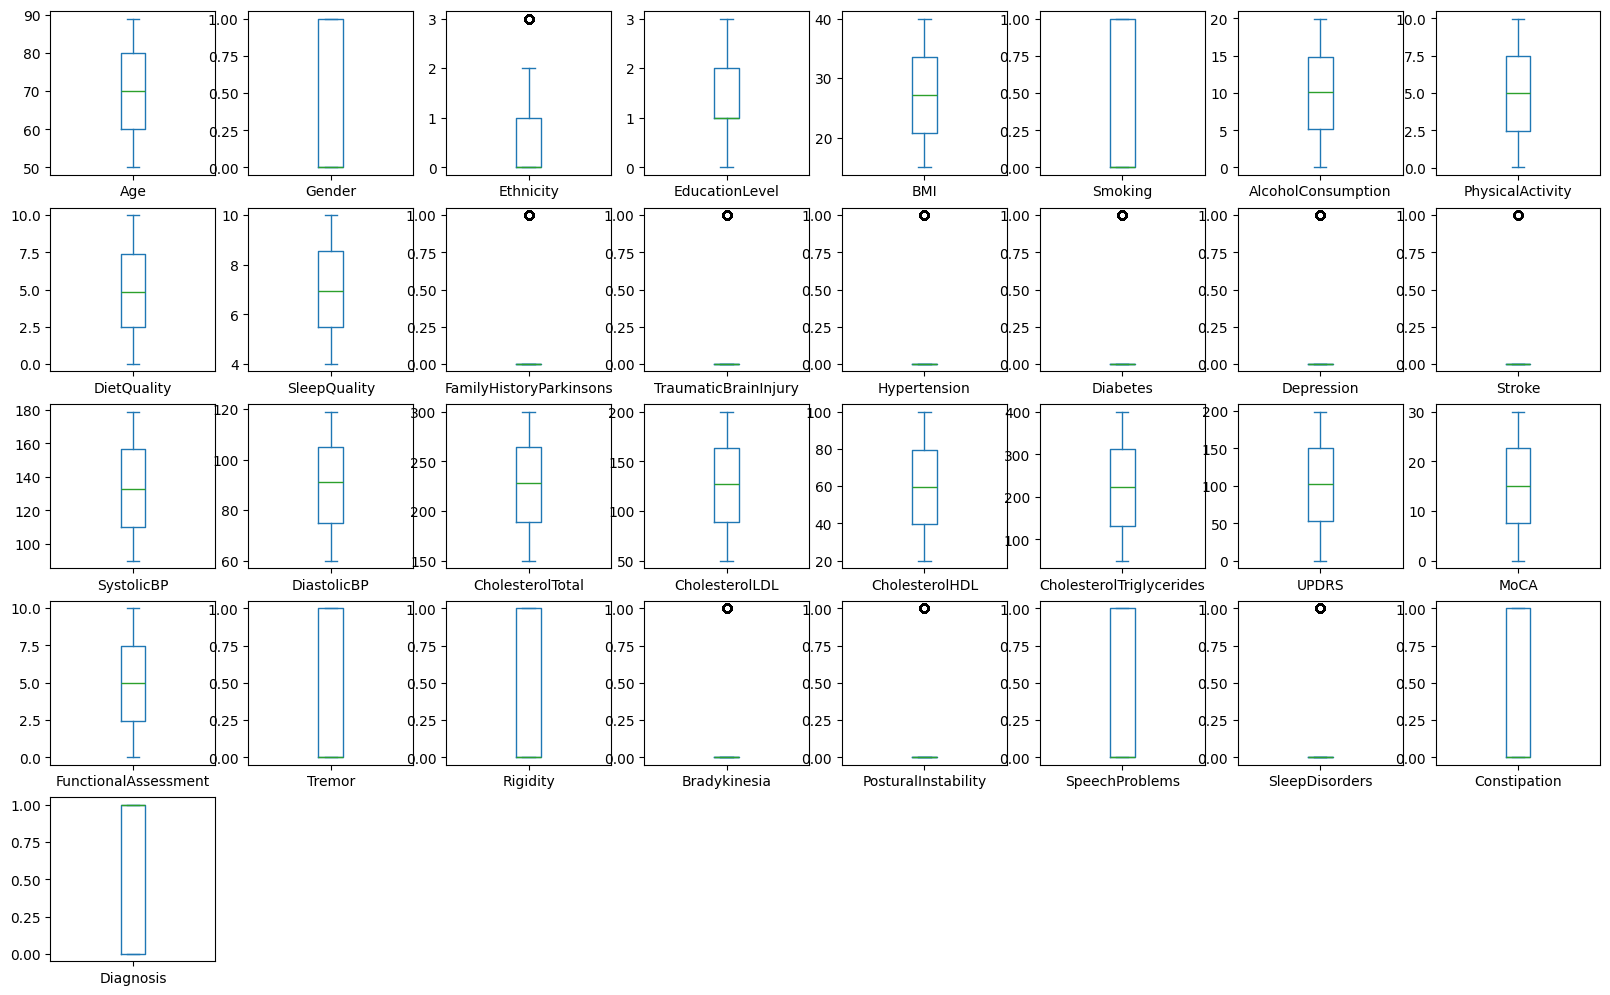

In [ ]:
df.plot(kind = "box" , subplots = True , figsize = (20,20) , layout = (8,8))
plt.show()

In [ ]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
# Exclude binary/categorical columns that were read as numbers but are not truly continuous
cols_to_exclude = ['Gender', 'Ethnicity', 'EducationLevel', 'Smoking','FamilyHistoryParkinsons',
                   'TraumaticBrainInjury', 'Hypertension', 'Diabetes', 'Depression',
                   'Stroke', 'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability',
                   'SpeechProblems', 'SleepDisorders', 'Constipation', 'Diagnosis']

numerical_cols = [col for col in numerical_cols if col not in cols_to_exclude]

print("Outliers detected using IQR method:")
for col in numerical_cols:
    outliers = detect_outliers_iqr(df, col)
    if not outliers.empty:
        print(f"\nOutliers in '{col}':")
        print(outliers[[col, 'Diagnosis']].head())
        print(f"Number of outliers in '{col}': {len(outliers)}")
    else:
        print(f"\nNo significant outliers detected in '{col}' using IQR.")

Outliers detected using IQR method:

No significant outliers detected in 'Age' using IQR.

No significant outliers detected in 'BMI' using IQR.

No significant outliers detected in 'AlcoholConsumption' using IQR.

No significant outliers detected in 'PhysicalActivity' using IQR.

No significant outliers detected in 'DietQuality' using IQR.

No significant outliers detected in 'SleepQuality' using IQR.

No significant outliers detected in 'SystolicBP' using IQR.

No significant outliers detected in 'DiastolicBP' using IQR.

No significant outliers detected in 'CholesterolTotal' using IQR.

No significant outliers detected in 'CholesterolLDL' using IQR.

No significant outliers detected in 'CholesterolHDL' using IQR.

No significant outliers detected in 'CholesterolTriglycerides' using IQR.

No significant outliers detected in 'UPDRS' using IQR.

No significant outliers detected in 'MoCA' using IQR.

No significant outliers detected in 'FunctionalAssessment' using IQR.


## Check Balance

In [ ]:
df['Diagnosis'].value_counts()

,count
Diagnosis,
1,1304
0,801


<ipython-input-10-66cdf205c7fa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diagnosis', data=df, palette='viridis', ax=ax)


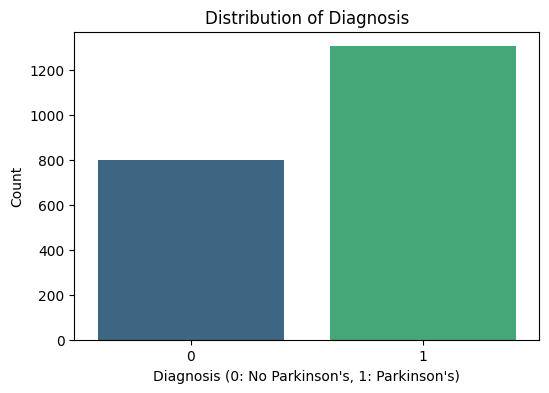

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot(x='Diagnosis', data=df, palette='viridis', ax=ax)
ax.set_title('Distribution of Diagnosis')
ax.set_xlabel('Diagnosis (0: No Parkinson\'s, 1: Parkinson\'s)')
ax.set_ylabel('Count')
plt.show()

## split the data

In [ ]:
x = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size= 0.25 , random_state= 555)


# xg boost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
    'scale_pos_weight': [1, 1.5, 1.63, 2]
}


grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

Fitting 5 folds for each of 2916 candidates, totalling 14580 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[17:02:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




In [ ]:
print(f"Best parameters: {best_params}")
print(f"Best cross-validated accuracy: {best_score:.2f}")

Best parameters: {'colsample_bytree': 0.9, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 1.5, 'subsample': 0.9}
Best cross-validated accuracy: 0.94


In [ ]:
xgb=XGBClassifier(colsample_bytree=0.9, gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=100, scale_pos_weight=1.5, subsample=0.9)
xgb.fit(x_train , y_train)
print(xgb.score(x_train,y_train))
print(xgb.score(x_test,y_test))

0.9683143219264893
0.9108159392789373


In [ ]:
y_pred=xgb.predict(x_test)

## Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Accuracy Score
print("\nAccuracy Score:")
acc_xgp=accuracy_score(y_test, y_pred)
print(acc_xgp)

# recall Score
print("\nrecall Score:")
recall_xgp=recall_score(y_test, y_pred)
print(recall_xgp)

Confusion Matrix:
[[172  39]
 [  8 308]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.82      0.88       211
           1       0.89      0.97      0.93       316

    accuracy                           0.91       527
   macro avg       0.92      0.89      0.90       527
weighted avg       0.91      0.91      0.91       527


Accuracy Score:
0.9108159392789373

recall Score:
0.9746835443037974


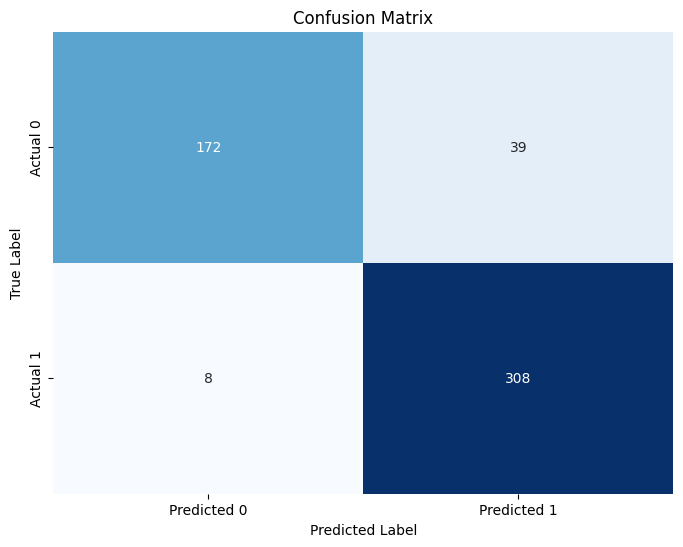

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
sample_patient_data = pd.DataFrame([{
    'Age': 65,
    'Gender': 0,  # Male
    'Ethnicity': 0,
    'EducationLevel': 2,
    'BMI': 25.5,
    'Smoking': 0,
    'AlcoholConsumption': 1,
    'PhysicalActivity': 2,
    'DietQuality': 3,
    'SleepQuality': 4,
    'FamilyHistoryParkinsons': 1,
    'TraumaticBrainInjury': 0,
    'Hypertension': 1,
    'Diabetes': 0,
    'Depression': 1,
    'Stroke': 0,
    'SystolicBP': 135,
    'DiastolicBP': 85,
    'CholesterolTotal': 200,
    'CholesterolLDL': 120,
    'CholesterolHDL': 50,
    'CholesterolTriglycerides': 150,
    'UPDRS': 30,
    'MoCA': 25,
    'FunctionalAssessment': 3,
    'Tremor': 1,
    'Rigidity': 1,
    'Bradykinesia': 1,
    'PosturalInstability': 0,
    'SpeechProblems': 0,
    'SleepDisorders': 1,
    'Constipation': 1,
}])

# Ensure the order of columns is the same as in x_train
sample_patient_data = sample_patient_data[x_train.columns]

# Predict on the sample patient data
prediction = xgb.predict(sample_patient_data)

# Print the prediction
if prediction[0] == 1:
    print("Prediction for the sample patient: Diagnosed with Parkinson's Disease")
else:
    print("Prediction for the sample patient: Not Diagnosed with Parkinson's Disease")

# get the probability
prediction_proba = xgb.predict_proba(sample_patient_data)
print(f"Prediction probabilities: {prediction_proba}")


Prediction for the sample patient: Diagnosed with Parkinson's Disease
Prediction probabilities: [[0.05702323 0.9429768 ]]


## download the model

In [ ]:
import joblib
from google.colab import files
# Save the trained model to a file
filename = 'xgboost_parkinsons_model.pkl'
joblib.dump(xgb, filename)

# Download the file
files.download(filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>